In [96]:
#imports
import pandas as pd
import numpy as np
import statistics

#setcopywarning fix
pd.options.mode.chained_assignment = None

### Project Feature 1:  Read Data in
##### FEATURE: Read data in from a local CSV

In [106]:
Tesla = pd.read_csv("TeslaFi92022 (updates for project).csv", low_memory=False)
df = pd.DataFrame(Tesla)

**df.shape** used to see size of Tesla dataframe 

In [107]:
df.shape

(45142, 31)

### Project Feature 2: 
FEATURE: Use built-in Pandas or Numpy functions to clean the data.

FIRST Cleaning:
Scrubbing of data to only show when vehicle state is 'online'

In [108]:
df[Tesla["state"] == "online"]

,data_id,Date,event_time,state,time_to_full_charge,charge_current_request,charge_to_max_range,battery_range,charge_limit_soc,charger_actual_current,...,charge_miles_added_rated,idleNumber,sleepNumber,driveNumber,chargeNumber,polling,idleTime,running,rerunning,maxRange
455,748397,9/1/2022,7:35:00 AM,online,0.0,32.0,0.0,42.06,84.0,0.0,...,134.0,0.0,1789.0,1871.0,0.0,NaN,0.0,0.0,0.0,226.94
456,748398,9/1/2022,7:36:00 AM,online,0.0,32.0,0.0,42.06,84.0,0.0,...,134.0,0.0,0.0,1871.0,0.0,NaN,0.0,0.0,0.0,226.94
457,748399,9/1/2022,7:36:00 AM,online,0.0,32.0,0.0,42.06,84.0,0.0,...,134.0,0.0,0.0,1871.0,0.0,NaN,0.0,0.0,0.0,226.94
458,748400,9/1/2022,7:37:00 AM,online,0.0,32.0,0.0,42.06,84.0,0.0,...,134.0,0.0,0.0,1871.0,0.0,NaN,0.0,0.0,0.0,226.94
459,748401,9/1/2022,7:37:00 AM,online,0.0,32.0,0.0,42.06,84.0,0.0,...,134.0,0.0,0.0,1871.0,0.0,NaN,0.0,0.0,0.0,226.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44925,792867,9/30/2022,8:24:00 PM,online,0.0,15.0,0.0,190.45,87.0,0.0,...,2.0,4816.0,0.0,0.0,0.0,NaN,7.0,0.0,0.0,226.94
44926,792868,9/30/2022,8:25:00 PM,online,0.0,15.0,0.0,190.45,87.0,0.0,...,2.0,4816.0,0.0,0.0,0.0,NaN,8.0,0.0,0.0,226.94
44927,792869,9/30/2022,8:26:00 PM,online,0.0,15.0,0.0,190.45,87.0,0.0,...,2.0,4816.0,0.0,0.0,0.0,NaN,9.0,0.0,0.0,226.94
44928,792870,9/30/2022,8:27:00 PM,online,0.0,15.0,0.0,190.45,87.0,0.0,...,2.0,4816.0,0.0,0.0,0.0,NaN,10.0,0.0,0.0,226.94


SECOND Cleaning: Vehicle state is "Online"; Time to Full Charge == number; AND, Charger Actual Current == number 

In [109]:
df[(Tesla["state"] == "online") & (Tesla["time_to_full_charge"] != False) & (Tesla["charger_actual_current"] != False)]

,data_id,Date,event_time,state,time_to_full_charge,charge_current_request,charge_to_max_range,battery_range,charge_limit_soc,charger_actual_current,...,charge_miles_added_rated,idleNumber,sleepNumber,driveNumber,chargeNumber,polling,idleTime,running,rerunning,maxRange
462,748404,9/1/2022,7:39:00 AM,online,6.25,24.0,0.0,42.06,84.0,24.0,...,0.0,4618.0,0.0,1871.0,0.0,NaN,0.0,0.0,0.0,226.94
463,748405,9/1/2022,7:40:00 AM,online,5.58,24.0,0.0,42.53,84.0,24.0,...,0.5,4618.0,0.0,0.0,1149.0,NaN,0.0,0.0,0.0,226.94
464,748406,9/1/2022,7:41:00 AM,online,5.58,24.0,0.0,43.49,84.0,24.0,...,1.5,0.0,0.0,0.0,1149.0,NaN,0.0,0.0,0.0,226.94
465,748407,9/1/2022,7:42:00 AM,online,5.58,24.0,0.0,43.49,84.0,24.0,...,1.5,0.0,0.0,0.0,1149.0,NaN,0.0,0.0,0.0,226.94
466,748408,9/1/2022,7:43:00 AM,online,5.50,24.0,0.0,43.97,84.0,24.0,...,2.0,0.0,0.0,0.0,1149.0,NaN,0.0,0.0,0.0,226.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,792835,9/30/2022,7:52:00 PM,online,0.08,15.0,0.0,189.97,87.0,15.0,...,1.5,0.0,0.0,0.0,1206.0,NaN,0.0,0.0,0.0,226.94
44894,792836,9/30/2022,7:53:00 PM,online,0.08,15.0,0.0,189.97,87.0,15.0,...,1.5,0.0,0.0,0.0,1206.0,NaN,0.0,0.0,0.0,226.94
44895,792837,9/30/2022,7:54:00 PM,online,0.08,15.0,0.0,189.97,87.0,15.0,...,1.5,0.0,0.0,0.0,1206.0,NaN,0.0,0.0,0.0,226.94
44896,792838,9/30/2022,7:55:00 PM,online,0.08,15.0,0.0,190.45,87.0,15.0,...,2.0,0.0,0.0,0.0,1206.0,NaN,0.0,0.0,0.0,226.94


THIRD Cleaning:  We still have a lot of data here.  I decided to use dropna() to clear rows with null values to give us a nice workable dataset.

This dataset was saved as the variable 'clean_Tesla'.

In [110]:
clean_Tesla = Tesla.dropna()
Tesla.dropna()

,data_id,Date,event_time,state,time_to_full_charge,charge_current_request,charge_to_max_range,battery_range,charge_limit_soc,charger_actual_current,...,charge_miles_added_rated,idleNumber,sleepNumber,driveNumber,chargeNumber,polling,idleTime,running,rerunning,maxRange
840,748782,9/1/2022,1:57:00 PM,online,0.0,24.0,0.0,190.67,84.0,0.0,...,148.5,4619.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94
5075,753017,9/4/2022,12:35:00 PM,online,0.0,24.0,0.0,188.29,84.0,0.0,...,146.0,4626.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94
7764,755706,9/6/2022,8:09:00 AM,online,0.0,24.0,0.0,112.30,84.0,0.0,...,146.0,4631.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94
9181,757123,9/7/2022,6:37:00 AM,online,0.0,24.0,0.0,190.17,84.0,0.0,...,156.0,4635.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94
9344,757286,9/7/2022,8:22:00 AM,online,0.0,24.0,0.0,116.11,84.0,0.0,...,156.0,4636.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94
10023,757965,9/7/2022,6:24:00 PM,online,0.0,32.0,0.0,37.74,84.0,0.0,...,156.0,4638.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94
18267,766209,9/13/2022,8:48:00 AM,online,0.0,32.0,0.0,113.72,84.0,0.0,...,163.5,4665.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94
19833,767775,9/14/2022,8:24:00 AM,online,0.0,32.0,0.0,121.43,87.0,0.0,...,174.5,4676.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94
27195,775137,9/19/2022,8:19:00 AM,online,0.0,32.0,0.0,118.53,87.0,0.0,...,2.0,4713.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94
28771,776713,9/20/2022,8:06:00 AM,online,0.0,32.0,0.0,122.81,87.0,0.0,...,147.0,4718.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94


# Product Feature 3: Analyze your data
FEATURE: Demonstrate at least five basic calculations from Python and Pandas.


ONE: 

Code below is uses <len()> to detail the number of occurrences.

In [111]:
len(clean_Tesla["Date"])

27

TWO:

Use of Python <statistics.mode> to find the most common State of Charge Limit.
This tells us the most frequently requested charge percentage in the month of September.

The most commonly requested charge limit in September was 87%.

In [112]:
statistics.mode(Tesla.charge_limit_soc)

87.0

THREE:

Using <np.sum> we total the column "charge_miles_added_rated".  This sum gives us the total number of miles that were added in the month of September.

In [113]:
np.sum(clean_Tesla.charge_miles_added_rated)

3046.5

FOUR:

Using <np.median> we see the median value of mileage added per charge is 91 miles.

In [114]:
np.median(clean_Tesla.charge_miles_added_rated)

91.0

FIVE:

<np.mean> applied to charge_limit_soc tell us the average charge limit set for the entire month

In [115]:
np.mean(clean_Tesla.charge_limit_soc)

86.22222222222223

SIX:

We have divided battery range and maximum range columns from our dataframe and multiplied that result by 100 to give us the average percentage of max range used.  These results have been added as an additional column titled "avg_percentage_used".

In [116]:
clean_Tesla["avg_percentage_used"] = (clean_Tesla["battery_range"] / clean_Tesla["maxRange"]) * 100

In [117]:
#One more data clean by dropping last row of data titled "Total" and ensuring type is int.
clean_Tesla.drop(clean_Tesla.tail(1).index,inplace=True)
clean_Tesla.battery_range.astype(int)

840      190
5075     188
7764     112
9181     190
9344     116
10023     37
18267    113
19833    121
27195    118
28771    122
30368    120
31129     32
32788    191
32834    190
32887    192
32933    191
32985    192
33032    191
33083    192
33129    191
33175    192
33254    192
33303    192
35398    190
37817    111
41007    111
Name: battery_range, dtype: int32

Information below includes new calculated field of avg_percentage_used details the percentage of available battery being utilized for driving.  Details tie to markdown notes above.

In [118]:
clean_Tesla

,data_id,Date,event_time,state,time_to_full_charge,charge_current_request,charge_to_max_range,battery_range,charge_limit_soc,charger_actual_current,...,idleNumber,sleepNumber,driveNumber,chargeNumber,polling,idleTime,running,rerunning,maxRange,avg_percentage_used
840,748782,9/1/2022,1:57:00 PM,online,0.0,24.0,0.0,190.67,84.0,0.0,...,4619.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94,84.017802
5075,753017,9/4/2022,12:35:00 PM,online,0.0,24.0,0.0,188.29,84.0,0.0,...,4626.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94,82.969067
7764,755706,9/6/2022,8:09:00 AM,online,0.0,24.0,0.0,112.30,84.0,0.0,...,4631.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94,49.484445
9181,757123,9/7/2022,6:37:00 AM,online,0.0,24.0,0.0,190.17,84.0,0.0,...,4635.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94,83.797480
9344,757286,9/7/2022,8:22:00 AM,online,0.0,24.0,0.0,116.11,84.0,0.0,...,4636.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94,51.163303
10023,757965,9/7/2022,6:24:00 PM,online,0.0,32.0,0.0,37.74,84.0,0.0,...,4638.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94,16.629946
18267,766209,9/13/2022,8:48:00 AM,online,0.0,32.0,0.0,113.72,84.0,0.0,...,4665.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94,50.110161
19833,767775,9/14/2022,8:24:00 AM,online,0.0,32.0,0.0,121.43,87.0,0.0,...,4676.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94,53.507535
27195,775137,9/19/2022,8:19:00 AM,online,0.0,32.0,0.0,118.53,87.0,0.0,...,4713.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94,52.229664
28771,776713,9/20/2022,8:06:00 AM,online,0.0,32.0,0.0,122.81,87.0,0.0,...,4718.0,0.0,0.0,0.0,False,-15.0,0.0,0.0,226.94,54.115625


SEVEN: 

Details below show the dates in the month a report was captured and the number of reports captured for that given day.

In [119]:
clean_Tesla["Date"].value_counts(sort=False)

9/1/2022     1
9/4/2022     1
9/6/2022     1
9/7/2022     3
9/13/2022    1
9/14/2022    1
9/19/2022    1
9/20/2022    1
9/21/2022    2
9/22/2022    3
9/23/2022    8
9/24/2022    1
9/26/2022    1
9/28/2022    1
Name: Date, dtype: int64

# Product Feature 4: Visualize your data

FEATURE: There are three basic plots below.  Details in Markdown above each.

Plot 1: Plot below is showing the available range in a given moment when the vehicle is online on the dates shown.

<AxesSubplot: xlabel='Battery Range (mi)', ylabel='Date'>

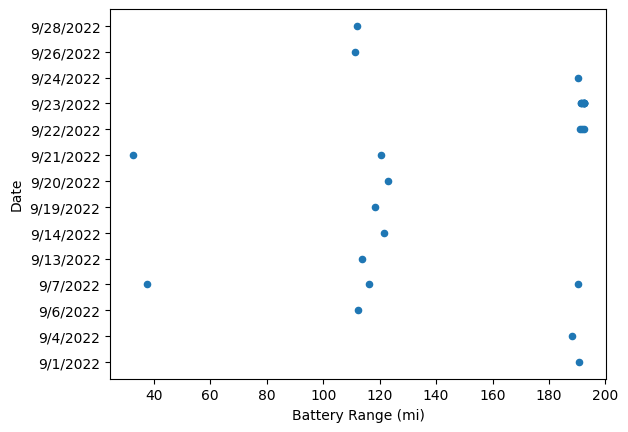

In [120]:
#Plot showing battery rage by date of charge.
clean_Tesla.plot(x="battery_range", y="Date", kind="scatter", xlabel="Battery Range (mi)") 

PLOT 2: Plot below is showing the requested amperage for charging to the specified percentage shown in plot 3.

<AxesSubplot: xlabel='Date', ylabel='Charge Amperage'>

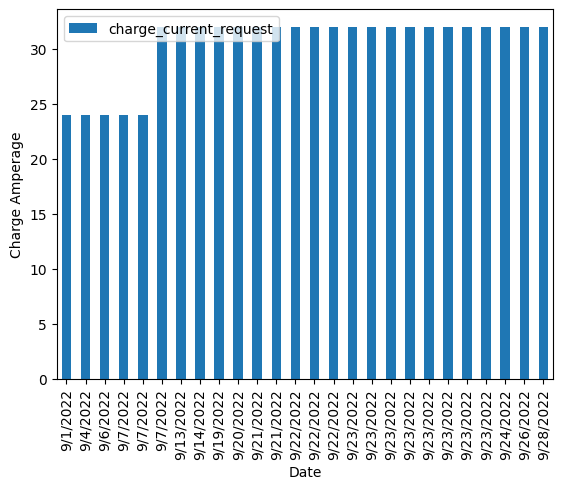

In [121]:
#Plot showing Amperage of charge by date
clean_Tesla.plot(x="Date", y="charge_current_request", kind="bar", ylabel="Charge Amperage")

 PLOT 3: Plot below is showing the amount of range (miles) added to charge to the requested battery percentage (i.e. requested 84%, approximately 180 miles added)

<AxesSubplot: xlabel='Requested Charge Limit (%)', ylabel='Range Added to Charge Limit (mi)'>

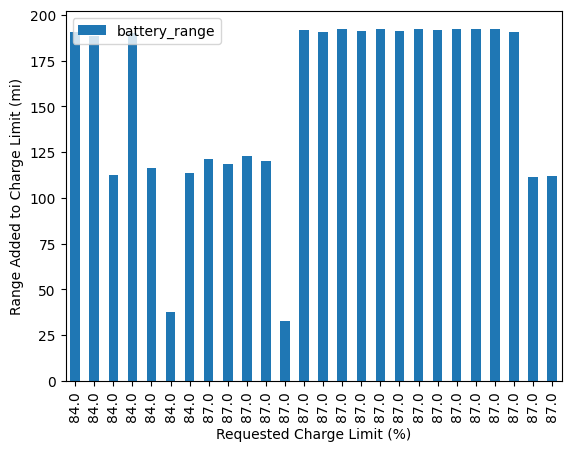

In [122]:
clean_Tesla.plot(x="charge_limit_soc", y="battery_range", kind="bar", xlabel="Requested Charge Limit (%)", ylabel="Range Added to Charge Limit (mi)")